<a href="https://colab.research.google.com/github/sebavassou/aula001py_mba/blob/main/Exercicios5_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícios
1. Exiba um gráfico de dispersão, do tipo KDE, da sua variável contínua,
particionado por alguma variável qualitativa.
2. Exiba o gráfico de dispersão do tipo scatter plot de duas variáveis,
preferencialmente contínuas, da sua amostra;
3. Exiba gráficos do tipo violin e estude a diferença de dispersão entre subclasses
da sua amostra.


In [1]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, gamma, beta, lognorm

In [4]:
#Conectando ao Google Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

Mounted at /content/drive


In [5]:
#Fazendo a leitura do dataset
import requests

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb.xlsx'
link = 'https://github.com/stefanomozart/estatistica_descritiva/raw/refs/heads/main/dados/originais/ideb/ideb_municipios2017.xlsx'


r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [6]:
df = pd.read_excel(f"{pasta}/{arquivo}", skipfooter=3, skiprows=9)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SG_UF         11262 non-null  object
 1   COD_MUN       11262 non-null  int64 
 2   NO_MUNICIPIO  11262 non-null  object
 3   REDE          11262 non-null  object
 4   TAP_MED       11262 non-null  object
 5   TAP_M01       11262 non-null  object
 6   TAP_M02       11262 non-null  object
 7   TAP_M03       11262 non-null  object
 8   TAP_M04       11262 non-null  object
 9   TAP_MNS       11262 non-null  object
 10  P12           11262 non-null  object
 11  PB12_MAT17    11262 non-null  object
 12  PB12_PORT17   11262 non-null  object
 13  PAD12_17      11262 non-null  object
 14  IDEB12_17     11262 non-null  object
 15  PROJEM_2019   11262 non-null  object
 16  PROJEM_2021   11262 non-null  object
dtypes: int64(1), object(16)
memory usage: 1.5+ MB


In [9]:

# Converter a coluna 'IDEB12_17' para numérico, tratando erros
df['IDEB12_17'] = pd.to_numeric(df['IDEB12_17'], errors='coerce')

# Exibir informações sobre o DataFrame atualizado
df.head()





,SG_UF,COD_MUN,NO_MUNICIPIO,REDE,TAP_MED,TAP_M01,TAP_M02,TAP_M03,TAP_M04,TAP_MNS,P12,PB12_MAT17,PB12_PORT17,PAD12_17,IDEB12_17,PROJEM_2019,PROJEM_2021
0,RO,1100015,Alta Floresta D'Oeste,Estadual,88.1,85,90.4,90.4,-,-,0.885253,269.38,260.96,4.379528,3.9,4.1,4.3
1,RO,1100015,Alta Floresta D'Oeste,Pública,88.1,85,90.4,90.4,-,-,0.885253,269.38,260.96,4.379528,3.9,4.1,4.3
2,RO,1100023,Ariquemes,Pública,84.7,80.3,85.1,92.8,81.8,80,0.847368,269.59,268.22,4.49116,3.8,4,4.2
3,RO,1100023,Ariquemes,Estadual,82.6,77.9,83,91.7,-,80,0.838216,269.1,267.82,4.47829,3.8,4,4.2
4,RO,1100031,Cabixi,Estadual,94.9,92.9,94.7,100,-,-,0.957734,255.98,239.01,3.862733,3.7,3.9,4.1


In [10]:
# prompt: Converter colunas 'SG_UF' e 'REDE' em string

# Convertendo as colunas 'SG_UF' e 'REDE' para tipo string
df['SG_UF'] = df['SG_UF'].astype(str)
df['REDE'] = df['REDE'].astype(str)

# Verificando os tipos de dados após a conversão
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         11262 non-null  object 
 1   COD_MUN       11262 non-null  int64  
 2   NO_MUNICIPIO  11262 non-null  object 
 3   REDE          11262 non-null  object 
 4   TAP_MED       11262 non-null  object 
 5   TAP_M01       11262 non-null  object 
 6   TAP_M02       11262 non-null  object 
 7   TAP_M03       11262 non-null  object 
 8   TAP_M04       11262 non-null  object 
 9   TAP_MNS       11262 non-null  object 
 10  P12           11262 non-null  object 
 11  PB12_MAT17    11262 non-null  object 
 12  PB12_PORT17   11262 non-null  object 
 13  PAD12_17      11262 non-null  object 
 14  IDEB12_17     10914 non-null  float64
 15  PROJEM_2019   11262 non-null  object 
 16  PROJEM_2021   11262 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 1.5+ MB


# HISTOGRAMA

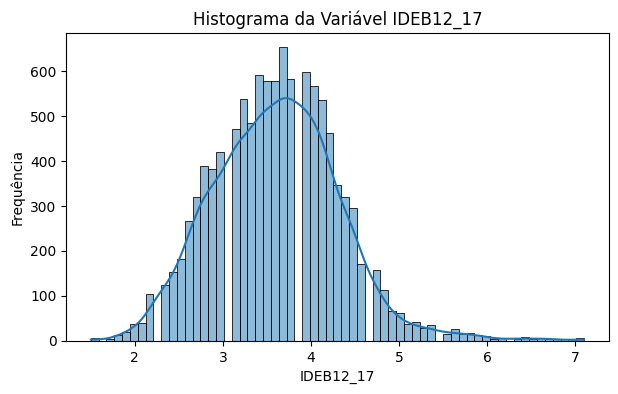

In [ ]:
# Plota o histograma da variável IDEB12_17
plt.figure(figsize=(7, 4))
sns.histplot(df['IDEB12_17'], kde=True)
plt.title('Histograma da Variável IDEB12_17')
plt.xlabel('IDEB12_17')
plt.ylabel('Frequência')
plt.show()


In [ ]:

# Calcular medidas de dispersão para a variável IDEB12_17

# Variância amostral
variance = df['IDEB12_17'].var()

# Desvio padrão amostral
std_dev = df['IDEB12_17'].std()

# Amplitude
amplitude = df['IDEB12_17'].max() - df['IDEB12_17'].min()

# Intervalo interquartílico (IIQ)
q1 = df['IDEB12_17'].quantile(0.25)
q3 = df['IDEB12_17'].quantile(0.75)
iqr = q3 - q1

# Coeficiente de dispersão quartílica
coefficient_quartile_dispersion = iqr / (q1 + q3)

# Coeficiente de variação
coefficient_variation = (std_dev / df['IDEB12_17'].mean()) * 100


print(f"Variância amostral: {variance}")
print(f"Desvio padrão amostral: {std_dev}")
print(f"Amplitude: {amplitude}")
print(f"Intervalo interquartílico (IIQ): {iqr}")
print(f"Coeficiente de dispersão quartílica: {coefficient_quartile_dispersion}")
print(f"Coeficiente de variação: {coefficient_variation}")


Variância amostral: 0.5159617406337557
Desvio padrão amostral: 0.7183047686280216
Amplitude: 5.6
Intervalo interquartílico (IIQ): 0.9999999999999996
Coeficiente de dispersão quartílica: 0.13888888888888884
Coeficiente de variação: 19.91474365959764


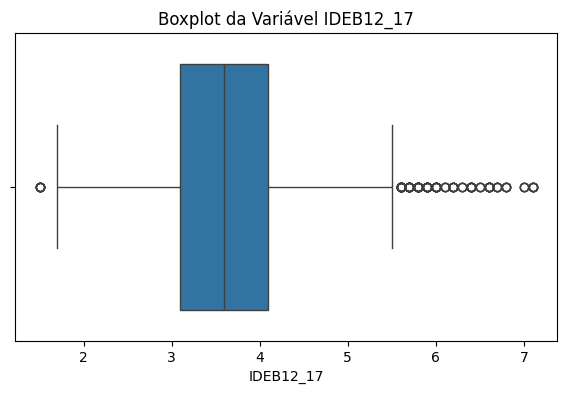

In [ ]:
# Boxplot com intervalo interquartil
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['IDEB12_17'])
plt.title('Boxplot da Variável IDEB12_17')
plt.xlabel('IDEB12_17')
plt.show()


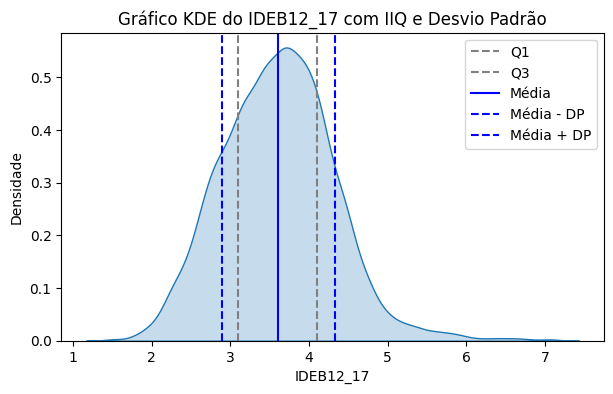

In [ ]:

#Plot
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula os quartis
q1 = df['IDEB12_17'].quantile(0.25)
q3 = df['IDEB12_17'].quantile(0.75)

# Calcula a média e o desvio padrão
media = df['IDEB12_17'].mean()
desvio_padrao = df['IDEB12_17'].std()

# Cria o gráfico KDE
plt.figure(figsize=(7, 4))
sns.kdeplot(df['IDEB12_17'], fill=True)

# Adiciona linhas verticais para Q1 e Q3 (cinza)
plt.axvline(x=q1, color='gray', linestyle='--', label='Q1')
plt.axvline(x=q3, color='gray', linestyle='--', label='Q3')


# Adiciona linhas verticais para a média e o desvio padrão (azul)
plt.axvline(x=media, color='blue', linestyle='-', label='Média')
plt.axvline(x=media - desvio_padrao, color='blue', linestyle='--', label='Média - DP')
plt.axvline(x=media + desvio_padrao, color='blue', linestyle='--', label='Média + DP')


plt.title('Gráfico KDE do IDEB12_17 com IIQ e Desvio Padrão')
plt.xlabel('IDEB12_17')
plt.ylabel('Densidade')
plt.legend()
plt.show()


In [ ]:
# Calcula a assimetria (skewness)
skewness = df['IDEB12_17'].skew()

# Calcula a curtose (kurtosis)
kurtosis = df['IDEB12_17'].kurt()

print(f"Assimetria (Skewness): {skewness}")
print(f"Curtose (Kurtosis): {kurtosis}")

# Interpretação da assimetria:
# Se skewness > 0: distribuição assimétrica positiva (cauda à direita)
# Se skewness < 0: distribuição assimétrica negativa (cauda à esquerda)
# Se skewness ≈ 0: distribuição simétrica

# Interpretação da curtose:
# Se kurtosis ≈ 3: distribuição mesocúrtica (semelhante à normal)
# Se kurtosis > 3: distribuição leptocúrtica (mais concentrada, caudas pesadas)
# Se kurtosis < 3: distribuição platicúrtica (menos concentrada, caudas leves)


Assimetria (Skewness): 0.40575152479189386
Curtose (Kurtosis): 0.9341874609501213


Com base no gráfico KDE fornecido e os valores de **assimetria**, **curtose**, e **IIQ**, seguem as respostas às perguntas:

---

### 1. A amostra é concentrada ou dispersa?

A amostra é **relativamente concentrada**. Isso pode ser observado pelos seguintes fatores:

- A maior densidade de dados está em torno da média, com uma curva KDE bem definida e um pico central.
- O intervalo interquartil (IIQ), que compreende os 50% centrais dos dados, é estreito em relação à amplitude total da distribuição.
- O desvio padrão também é pequeno, indicando que a maioria dos valores está próxima da média.

Esses elementos sugerem baixa dispersão na amostra.

---

### 1.2. A amplitude interna (IIQ) é proporcional à amplitude total da amostra?

Não exatamente. O **IIQ** (representado pela distância entre Q1 e Q3) é uma fração significativa da amplitude total, mas não proporcional no sentido estrito:

- O IIQ captura a maioria dos dados centrais (50%), enquanto a amplitude total considera os valores extremos.
- Como a distribuição apresenta baixa assimetria positiva e curtose platicúrtica, a amplitude total é ligeiramente maior devido à presença de caudas mais longas, mas sem valores extremos significativos.

Isso indica que o IIQ é uma boa representação da concentração dos dados centrais, mas não reflete toda a variabilidade presente na amostra.

---

### 1.3. Quais as implicações dessas informações em relação ao contexto/significado concreto dessa variável?

A variável **IDEB12_17**  representa um índice educacional (IDEB - Índice de Desenvolvimento da Educação Básica). As implicações são:

1. **Baixa dispersão**:
   - A concentração dos valores indica que as  regiões avaliadas têm desempenhos educacionais relativamente homogêneos.
   - Não há grandes desigualdades nos resultados representados por essa variável.

2. **Amplitude interna (IIQ)**:
   - Como o IIQ captura bem os valores centrais, ele reflete a "zona típica" de desempenho educacional para a maioria das escolas/regiões.
   - Isso pode ser útil para identificar padrões gerais e definir metas realistas para melhoria.

3. **Caudas mais leves**:
   - A leve assimetria positiva sugere que há algumas escolas/regiões com desempenhos ligeiramente acima do padrão central, mas não são casos extremos.
   - Isso pode indicar que políticas públicas ou intervenções específicas podem estar funcionando para evitar discrepâncias muito grandes.

Em resumo, os dados sugerem um cenário educacional relativamente equilibrado, com pequenas variações positivas que podem ser exploradas para melhorar ainda mais o desempenho geral.



Com base no gráfico KDE e nos valores de assimetria (skewness) e curtose fornecidos, podemos fazer uma análise mais completa da distribuição dos dados.

---

### **Análise da Assimetria (Skewness)**

- **Valor da assimetria: 0.40575152479189386**
  - A assimetria positiva indica que a distribuição tem uma leve cauda mais longa à direita.
  - Embora o gráfico KDE pareça quase simétrico, o valor positivo da assimetria confirma que há uma pequena inclinação para valores maiores de **IDEB12_17**.
  - Essa assimetria é considerada **baixa**, já que está próxima de zero.

---

### **Análise da Curtose**

- **Valor da curtose: 0.9341874609501213**
  - A curtose mede o "achatamento" ou "pontualidade" da distribuição em relação a uma normal.
  - Um valor de curtose próximo de 3 indica uma distribuição normal (mesocúrtica).
  - O valor fornecido (próximo de 1) sugere que a distribuição é **platicúrtica**, ou seja, mais achatada e com caudas menos extremas do que uma normal.
  - Isso é consistente com o gráfico KDE, que mostra uma curva relativamente ampla e sem picos muito acentuados.

---

### **Resumo da Distribuição**

1. **Forma Geral**:
   - A distribuição é aproximadamente simétrica, com leve assimetria positiva.
   - É mais achatada do que uma normal (platicúrtica).

2. **Interpretação Estatística**:
   - A leve assimetria indica que os valores maiores de IDEB12_17 ocorrem com um pouco mais de frequência do que os menores.
   - A baixa curtose sugere menor probabilidade de valores extremos (outliers) em ambas as caudas.

3. **Conclusão**:
   - A distribuição dos dados é bem comportada, com pouca assimetria e caudas leves.
   - Os valores médios e centrais são representativos das observações, enquanto os desvios padrão e o intervalo interquartil capturam bem a variabilidade.





Com base no gráfico KDE fornecido e nas informações sobre as medidas de dispersão (IIQ, desvio padrão) e forma (assimetria e curtose), podemos analisar a presença de outliers e propor uma forma de tratá-los.

---

### **Existência de Outliers**
1. **Identificação pelo Gráfico**:
   - O gráfico KDE mostra que a densidade dos dados diminui gradualmente nas extremidades (caudas), sem picos ou valores extremos evidentes.
   - A leve assimetria positiva (skewness = 0.405) sugere que há uma pequena tendência para valores maiores, mas não indica outliers significativos.

2. **Critério do Intervalo Interquartil (IIQ)**:
   - O IIQ é delimitado por $$ Q1 $$
 e $$ Q3 $$
, que representam os 25% e 75% dos dados, respectivamente.
   - Outliers podem ser definidos como valores fora do intervalo:
     $$
     [Q1 - 1,5 \times IIQ, \, Q3 + 1,5 \times IIQ]
     $$
   - No gráfico, as caudas são suaves e não ultrapassam significativamente os limites esperados para o intervalo acima, sugerindo que poucos ou nenhum outlier está presente.

3. **Curtose (kurtosis = 0.934)**:
   - A distribuição platicúrtica indica caudas leves, reforçando a ausência de valores extremos significativos.

---

### **Forma de Eliminar Outliers**
Caso seja necessário tratar possíveis outliers, uma abordagem prática seria:

1. **Usar o critério do IIQ**:
   - Calcular os limites inferior ($$
 Q1 - 1,5 \times IIQ $$) e superior ($$
 Q3 + 1,5 \times IIQ $$).
   - Remover valores fora desses limites.

2. **Padronização por Z-Score**:
   - Calcular o Z-score para cada dado:
     $$
     Z = \frac{x - \text{média}}{\text{desvio padrão}}
     $$
   - Valores com $$
 |Z| > 3 $$ podem ser considerados outliers.

3. **Impacto no Contexto**:
   - A remoção de outliers deve ser feita com cuidado, pois pode eliminar informações relevantes.
   - No caso do IDEB12_17 (indicador educacional), outliers podem representar escolas ou regiões com desempenhos muito baixos ou altos, o que pode ser relevante para políticas públicas.

---

### **Conclusão**
O gráfico e as medidas indicam que há poucos ou nenhum outlier significativo na amostra. Caso seja necessário eliminá-los, o critério do IIQ ou a padronização por Z-score são métodos adequados. No entanto, é importante avaliar o impacto dessa remoção no contexto da análise, especialmente se os valores extremos forem relevantes para a interpretação dos resultados.

*Análise realizada com auxilio de IA